Demonstrate the use of `nucleobench` using PyPi.

Task: Count substrings.

In [ ]:
!pip install nucleobench

Sanity test: use a neural network that counts substrings.

In [ ]:
VOCAB = ['A', 'C', 'T', 'G']

import argparse
import torch
import torch.nn.functional as F
from typing import Optional

from nucleobench.common import string_utils

from nucleobench.models import model_class as mc

class CountSubstringModel(torch.nn.Module):
    """Count number of substrings, using convs."""
    def __init__(self, substring: str, vocab: list[str] = VOCAB):
        super().__init__()
        self.substring = substring
        self.vocab = vocab

        self.substr_tensor = string_utils.dna2tensor(
            substring, vocab_list=self.vocab)
        self.substr_tensor = torch.unsqueeze(self.substr_tensor, dim=0)
        self.substr_tensor.requires_grad = False


    def forward(self, x: torch.Tensor) -> torch.Tensor:
        assert x.ndim == 3
        assert x.shape[1] == 4, x.shape
        out_tensor = F.conv1d(x, self.substr_tensor)
        out_tensor = torch.squeeze(out_tensor, 1)
        # We square it so it's nonlinear. That is, getting all 3 in one window should be
        # better than getting 2 in one window and 1 in another.
        out_tensor = torch.square(out_tensor)
        out_tensor = torch.sum(out_tensor, dim=1)

        # Flip the sign, so lower is better.
        out_tensor *= -1

        return out_tensor

    def inference_on_tensor(self, x: torch.Tensor) -> torch.Tensor:
        return self.forward(x)

    def __call__(self, seqs: list[str]):
        torch_seq = string_utils.dna2tensor_batch(seqs)
        result = self.inference_on_tensor(torch_seq)
        assert result.ndim == 1, result.shape
        return [float(x) for x in result]

Parsed TISM args: None


100%|██████████| 5/5 [00:00<00:00, 648.01it/s]


Best score: -38.0
After 0.02s, fitness -38.00: ATGCAACAAA



100%|██████████| 5/5 [00:00<00:00, 709.46it/s]


Score did not improve on iteration: 4
Best score: -51.0
After 0.03s, fitness -51.00: ATGCATGCAA



100%|██████████| 5/5 [00:00<00:00, 620.18it/s]


Score did not improve on iteration: 1
Score did not improve on iteration: 2
Score did not improve on iteration: 3
Score did not improve on iteration: 4
Best score: -51.0
After 0.04s, fitness -51.00: ATGCATGCAA



100%|██████████| 5/5 [00:00<00:00, 728.86it/s]


Score did not improve on iteration: 1
Score did not improve on iteration: 2
Score did not improve on iteration: 3
Score did not improve on iteration: 4
Best score: -51.0
After 0.06s, fitness -51.00: ATGCATGCAA



100%|██████████| 5/5 [00:00<00:00, 671.24it/s]


Score did not improve on iteration: 1
Score did not improve on iteration: 2
Score did not improve on iteration: 3
Score did not improve on iteration: 4
Best score: -51.0
After 0.07s, fitness -51.00: ATGCATGCAA



100%|██████████| 5/5 [00:00<00:00, 658.10it/s]


Score did not improve on iteration: 1
Score did not improve on iteration: 2
Score did not improve on iteration: 3
Score did not improve on iteration: 4
Best score: -51.0
After 0.08s, fitness -51.00: ATGCATGCAA



100%|██████████| 5/5 [00:00<00:00, 616.25it/s]


Score did not improve on iteration: 1
Score did not improve on iteration: 2
Score did not improve on iteration: 3
Score did not improve on iteration: 4
Best score: -51.0
After 0.09s, fitness -51.00: ATGCATGCAA



 40%|████      | 8/20 [00:00<00:00, 75.20it/s]

Score did not improve on iteration: 1
Score did not improve on iteration: 2
Score did not improve on iteration: 3
Score did not improve on iteration: 4
Best score: -51.0
After 0.11s, fitness -51.00: ATGCATGCAA



100%|██████████| 5/5 [00:00<00:00, 623.35it/s]


Score did not improve on iteration: 1
Score did not improve on iteration: 2
Score did not improve on iteration: 3
Score did not improve on iteration: 4
Best score: -51.0
After 0.12s, fitness -51.00: ATGCATGCAA



100%|██████████| 5/5 [00:00<00:00, 621.53it/s]


Score did not improve on iteration: 1
Score did not improve on iteration: 2
Score did not improve on iteration: 3
Score did not improve on iteration: 4
Best score: -51.0
After 0.14s, fitness -51.00: ATGCATGCAA



100%|██████████| 5/5 [00:00<00:00, 577.23it/s]


Score did not improve on iteration: 1
Score did not improve on iteration: 2
Score did not improve on iteration: 3
Score did not improve on iteration: 4
Best score: -51.0
After 0.15s, fitness -51.00: ATGCATGCAA



100%|██████████| 5/5 [00:00<00:00, 609.19it/s]


Score did not improve on iteration: 1
Score did not improve on iteration: 2
Score did not improve on iteration: 3
Score did not improve on iteration: 4
Best score: -51.0
After 0.16s, fitness -51.00: ATGCATGCAA



100%|██████████| 5/5 [00:00<00:00, 571.12it/s]


Score did not improve on iteration: 1
Score did not improve on iteration: 2
Score did not improve on iteration: 3
Score did not improve on iteration: 4
Best score: -51.0
After 0.18s, fitness -51.00: ATGCATGCAA



100%|██████████| 5/5 [00:00<00:00, 580.33it/s]


Score did not improve on iteration: 1
Score did not improve on iteration: 2
Score did not improve on iteration: 3
Score did not improve on iteration: 4
Best score: -51.0
After 0.19s, fitness -51.00: ATGCATGCAA



  0%|          | 0/5 [00:00<?, ?it/s]

Score did not improve on iteration: 1


100%|██████████| 5/5 [00:00<00:00, 495.89it/s]


Score did not improve on iteration: 2
Score did not improve on iteration: 3
Score did not improve on iteration: 4
Best score: -51.0
After 0.21s, fitness -51.00: ATGCATGCAA



  0%|          | 0/5 [00:00<?, ?it/s]

Score did not improve on iteration: 1
Score did not improve on iteration: 2


 80%|████████  | 16/20 [00:00<00:00, 71.93it/s]

Score did not improve on iteration: 3
Score did not improve on iteration: 4
Best score: -51.0
After 0.22s, fitness -51.00: ATGCATGCAA



100%|██████████| 5/5 [00:00<00:00, 680.12it/s]

Score did not improve on iteration: 1
Score did not improve on iteration: 2
Score did not improve on iteration: 3
Score did not improve on iteration: 4
Best score: -51.0


After 0.24s, fitness -51.00: ATGCATGCAA



100%|██████████| 5/5 [00:00<00:00, 495.13it/s]

Score did not improve on iteration: 1
Score did not improve on iteration: 2
Score did not improve on iteration: 3
Score did not improve on iteration: 4


Best score: -51.0
After 0.25s, fitness -51.00: ATGCATGCAA



  0%|          | 0/5 [00:00<?, ?it/s]

Score did not improve on iteration: 1


100%|██████████| 5/5 [00:00<00:00, 353.75it/s]


Score did not improve on iteration: 2
Score did not improve on iteration: 3
Score did not improve on iteration: 4
Best score: -51.0
After 0.27s, fitness -51.00: ATGCATGCAA



  0%|          | 0/5 [00:00<?, ?it/s]

Score did not improve on iteration: 1
Score did not improve on iteration: 2
Score did not improve on iteration: 3
Score did not improve on iteration: 4


100%|██████████| 20/20 [00:00<00:00, 69.19it/s]


Best score: -51.0
After 0.29s, fitness -51.00: ATGCATGCAA


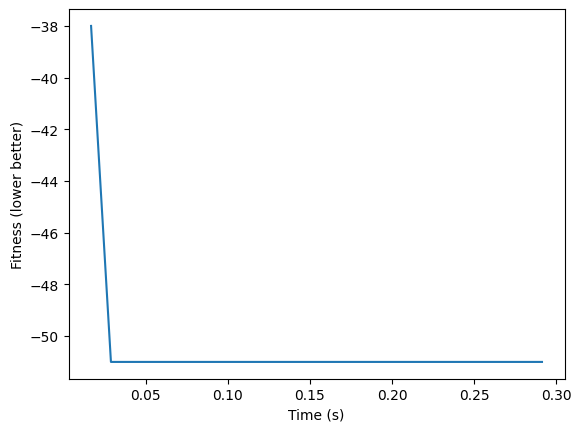

In [ ]:
# Pick an optimization method:
# Some examples are 'ledidi', 'directed_evolution', etc.
# Full list:
# https://github.com/move37-labs/nucleobench/blob/main/nucleobench/optimizations/__init__.py

# Params to play with.
OPT_NAME = 'directed_evolution'
NUM_ROUNDS = 20
N_STEPS_PER_ROUND = 5
TARGET_SUBSTR = 'AGTCA'
START_SEQ = 'A' * 10

import numpy as np
from nucleobench import optimizations
opt_obj = optimizations.get_optimization(OPT_NAME)

# Use default initial args, or specify.
opt_init_args = opt_obj.debug_init_args()
opt_run_args = opt_obj.debug_run_args()
if OPT_NAME == 'ledidi':
  opt_init_args['lr'] = 1.0
  opt_init_args['train_batch_size'] = 64

model_fn = CountSubstringModel(substring=TARGET_SUBSTR)
del opt_init_args['model_fn']
del opt_init_args['seed_sequence']
opt = opt_obj(model_fn=model_fn, seed_sequence=START_SEQ, vocab=VOCAB, **opt_init_args)

import tqdm
import time
from matplotlib import pyplot as plt

proposals, losses, times = [], [], []
start_time = time.time()
for i in tqdm.trange(NUM_ROUNDS):
  if opt.is_finished():
      break

  # Take some optimization steps.
  opt.run(
      n_steps=N_STEPS_PER_ROUND,
      **opt_run_args)

  # Get some samples and score them.
  samples = opt.get_samples(n_samples=1)
  scores = model_fn(samples)
  proposals.extend(samples)
  losses.append(np.mean(scores))
  times.append(time.time() - start_time)

  # Print results.
  print(f'After {time.time() - start_time:.2f}s, fitness {losses[-1]:.2f}: {samples[0]}')
plt.plot(times, losses, label=OPT_NAME)
plt.xlabel('Time (s)')
plt.ylabel('Fitness (lower better)')
plt.show()